In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "pictures/"
CATEGORIES = ["Bishop", "Knight", "Pawn", "Queen", "Rook"]

In [2]:
def create_data():
    min_size = 150
    training_data = []
    for category in CATEGORIES:
        path = DATADIR + category
        category_index = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(path + '/' + img)
            if img_array.shape[0] < min_size or img_array.shape[1] < min_size:
                continue
            img_resized = cv2.resize(img_array, (min_size, min_size))
            training_data.append([img_resized, category_index])
    return training_data

In [3]:
training_data = create_data()

In [4]:
import random

# to mix the data
random.shuffle(training_data)

In [5]:
X = [] # the X_training
Y = [] # the Y_training

In [6]:
for pixels, category in training_data:
    X.append(pixels)
    Y.append(category)

In [7]:
X = np.array(X)
# X = X.reshape(X.shape[0], X.shape[1], X.shape[2],1)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(1929, 150, 150, 3)
(1929,)


In [8]:
import tensorflow as tf
X = X / 255.0

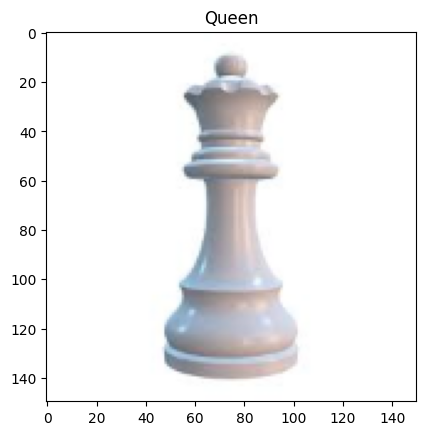

In [9]:
index_test = 67
plt.imshow(X[index_test])
plt.title(CATEGORIES[Y[index_test]])
plt.show()

In [10]:
split_size = int(0.8 * X.shape[0])

X_train = X[:split_size, :]
X_test = X[split_size:, :]

Y_train = Y[:split_size]
Y_test = Y[split_size:]

In [11]:
print(X.shape[1:])

(150, 150, 3)


In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64 , (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X_train, Y_train, epochs=8)

Epoch 1/8


ResourceExhaustedError: Graph execution error:

Detected at node adam/Square_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\khiro\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\khiro\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Users\khiro\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3047, in run_cell

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3102, in _run_cell

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3489, in run_ast_nodes

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3549, in run_code

  File "C:\Users\khiro\AppData\Local\Temp\ipykernel_13824\3624073211.py", line 1, in <module>

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 80, in train_step

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 383, in apply_gradients

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 448, in apply

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 511, in _backend_apply_gradients

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 120, in _backend_update_step

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 134, in _distributed_tf_update_step

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 131, in apply_grad_to_update_var

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\optimizers\adam.py", line 138, in update_step

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\ops\numpy.py", line 6303, in square

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\sparse.py", line 387, in sparse_wrapper

  File "c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 2594, in square

OOM when allocating tensor with shape[165888,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node adam/Square_4}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_multi_step_on_iterator_2591]

In [ ]:
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5933 - loss: 1.6435
0.5803108811378479


In [ ]:
predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step


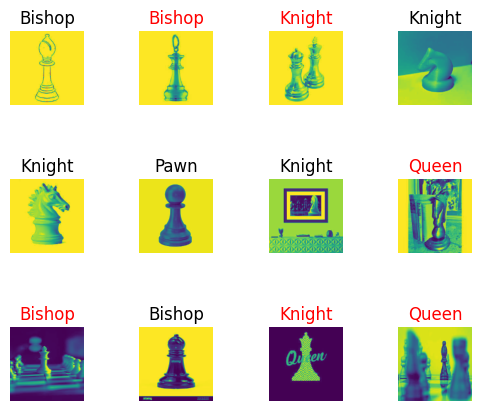

In [ ]:
x = 5
y = x+12
# printing some pictures of the x_test and it's predictions as title
false_values = 0
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'black'
    if np.argmax(predictions[i]) != Y_test[i]:
        false_values = false_values + 1
        color = 'red'
    plt.title(CATEGORIES[np.argmax(predictions[i])], color=color)
plt.show()

In [ ]:
print(len(X_test))

386
